In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Import File

In [2]:
path = "C:\\CSE\\Chirag-Rao-KV\\Task 3.2\\Threats (1).csv"
df = pd.read_csv(path)
df

,Unnamed: 0,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,40000,40001,0.012996,tcp,-,FIN,16,18,1540,1644,...,1,6,0,0,0,5,7,0,Normal,0
1,40001,40002,0.004119,tcp,-,FIN,12,12,1064,2260,...,1,1,0,0,0,3,8,0,Normal,0
2,40002,40003,0.000988,udp,dns,CON,2,2,146,178,...,1,2,0,0,0,7,2,0,Normal,0
3,40003,40004,3.415787,tcp,ssh,FIN,230,238,24344,29556,...,1,1,0,0,0,4,1,0,Normal,0
4,40004,40005,0.193943,tcp,-,FIN,72,74,4238,63618,...,1,5,0,0,0,6,12,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135336,175336,175337,0.000009,udp,dns,INT,2,0,114,0,...,13,24,0,0,0,24,24,0,Generic,1
135337,175337,175338,0.505762,tcp,-,FIN,10,8,620,354,...,1,2,0,0,0,1,1,0,Shellcode,1
135338,175338,175339,0.000009,udp,dns,INT,2,0,114,0,...,3,13,0,0,0,3,12,0,Generic,1
135339,175339,175340,0.000009,udp,dns,INT,2,0,114,0,...,14,30,0,0,0,30,30,0,Generic,1


Drop the duplicate rows

In [3]:
columns_drop = {'Unnamed: 0','id'}
df = df.drop(columns=columns_drop,errors='ignore')
df = df.drop_duplicates()

Exchange  'label' & 'attack_cat'

In [4]:
#exchange last two columns
col = [ 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports',  'label','attack_cat']
df = df[col]


# Visualise the attack categories

In [5]:
from pywaffle import Waffle

In [6]:
category_counts = df['attack_cat'].value_counts()
category_counts = round(category_counts*100/(np.sum(category_counts)),3)
data = pd.DataFrame({'attack_cat': category_counts.index, 'count': category_counts.values})
data_sorted = data.sort_values(by='count', ascending=False)
plot_lable = [f'{i} ({str(j)} %)'for i,j in zip(data_sorted['attack_cat'], data_sorted['count'])]
colors = [
    "#FF5733", 
    "#33FF57",
    "#3357FF",  
    "#FFD133",  
    "#8D33FF",  
    "#FF33A8",  
    "#33FFF3", 
    "#FF8C33",  
    "#A833FF",
    "#57FF33"
]


It can be seen attack categories Analysis (2.331 %), Backdoor (2.244 %), Shellcode (1.595 %),Worms (0.186 %) have a very presence.

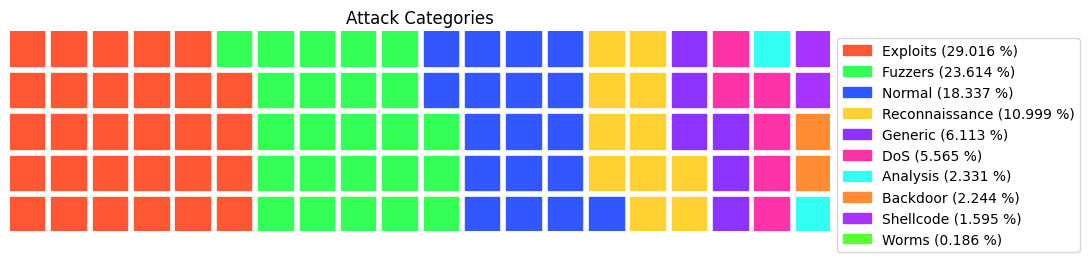

In [7]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  
    columns = 20,
    values=data['count'],  
    figsize=(11, 5),  
    colors = colors,
    labels=plot_lable,  
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},  
    title={'label': "Attack Categories", 'loc': 'center'}  
)

# Ordinal Encoding
Assigning unique value to each category

In [8]:
from sklearn.preprocessing import OrdinalEncoder


cat_col = df.select_dtypes(exclude=['number']).columns
cat_col = ['proto', 'service', 'state']
encoder = OrdinalEncoder()
df[cat_col] = encoder.fit_transform(df[cat_col])
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat
0,0.012996,111.0,0.0,1.0,16,18,1540,1644,2539.242797,31,...,1,6,0,0,0,5,7,0,0,Normal
1,0.004119,111.0,0.0,1.0,12,12,1064,2260,5583.879675,31,...,1,1,0,0,0,3,8,0,0,Normal
2,0.000988,117.0,2.0,0.0,2,2,146,178,3036.437382,31,...,1,2,0,0,0,7,2,0,0,Normal
3,3.415787,111.0,11.0,1.0,230,238,24344,29556,136.718127,31,...,1,1,0,0,0,4,1,0,0,Normal
4,0.193943,111.0,0.0,1.0,72,74,4238,63618,747.642372,31,...,1,5,0,0,0,6,12,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135267,1.914309,111.0,9.0,1.0,74,30,69997,2132,53.805315,62,...,1,1,0,0,0,18,1,0,1,Exploits
135277,3.719110,111.0,0.0,1.0,66,340,3086,426483,108.897021,62,...,1,1,0,0,0,2,1,0,1,Exploits
135299,0.996503,111.0,7.0,1.0,20,30,942,16684,49.171955,62,...,1,1,0,0,0,7,1,0,1,Exploits
135305,1.557125,111.0,9.0,1.0,28,22,12601,1954,31.468251,62,...,1,2,0,0,0,2,1,0,1,Exploits


# Split test train data

In [9]:
from sklearn.model_selection import train_test_split

feature = [col for col in df.columns if col != 'attack_cat']
x = df[feature]
y = df['attack_cat']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5, shuffle= True)


# Train decision tree

In [10]:
from sklearn import tree

In [11]:
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)


# Confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix

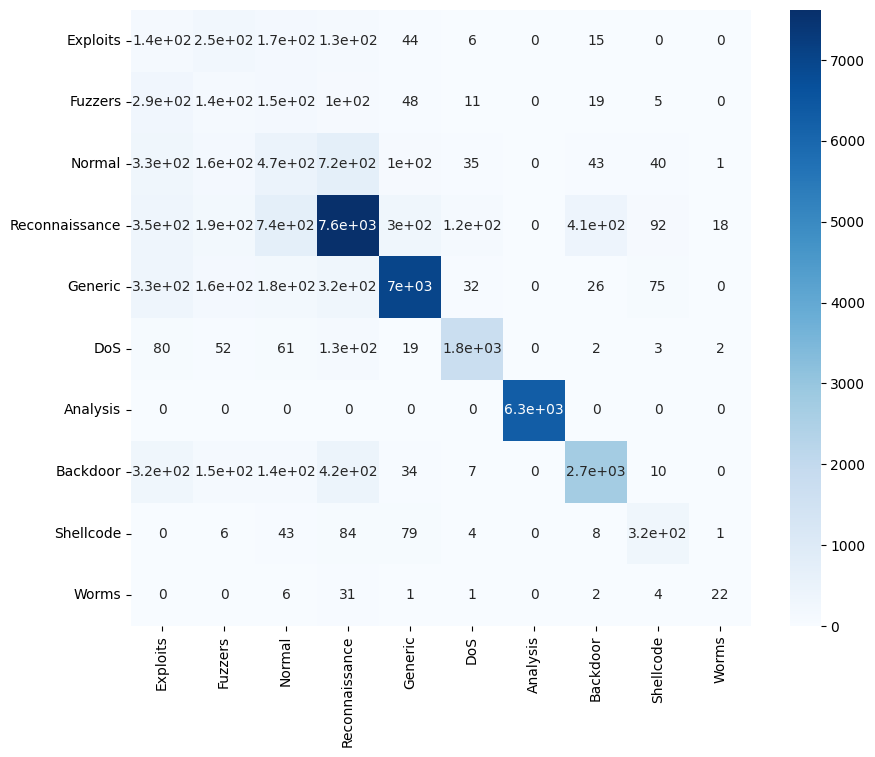

In [13]:
y_test_predict = classifier.predict(x_test) 
confu_matrix = confusion_matrix(y_test,y_test_predict)
categories_array = data['attack_cat']
plt.figure(figsize=(10, 8)) 
sns.heatmap(confu_matrix,xticklabels=categories_array,yticklabels=categories_array,cmap='Blues',annot=True)
plt.show()

# Evaluation of model

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [15]:
print('For overall data')
accuracy = accuracy_score(y_test, y_test_predict)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_test_predict,average='macro')
print(f"Precision: {precision}")


recall = recall_score(y_test, y_test_predict,average='macro')
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_test_predict,average='macro')
print(f"F1 Score: {f1}")
print('\nFor each categories\n')
classification_report = classification_report(y_test,y_test_predict)
print(classification_report)


For overall data
Accuracy: 0.7743888174055445
Precision: 0.5962143258517671
Recall: 0.5709224477736542
F1 Score: 0.5783687472559584

For each categories

                precision    recall  f1-score   support

      Analysis       0.07      0.18      0.11       753
      Backdoor       0.12      0.18      0.15       768
           DoS       0.24      0.25      0.25      1898
      Exploits       0.80      0.77      0.79      9843
       Fuzzers       0.92      0.86      0.89      8133
       Generic       0.89      0.83      0.86      2096
        Normal       1.00      1.00      1.00      6290
Reconnaissance       0.84      0.72      0.77      3807
     Shellcode       0.58      0.58      0.58       541
         Worms       0.50      0.33      0.40        67

      accuracy                           0.77     34196
     macro avg       0.60      0.57      0.58     34196
  weighted avg       0.81      0.77      0.79     34196

